In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,916.000000,916.000000,738.000000,916.000000,916.000000,916.000000
mean,0.377729,2.288210,29.651531,0.508734,0.396288,32.623007
std,0.485084,0.842785,14.635242,1.041715,0.907255,46.587804
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### Создадим колонку New_title, которая содержит префиксы к имени наших граждан. И как мы увидим, мистеры не выживали с шансом 90 %, а мисис выживали с шансом 87%. Далее мы этот столбец преобразуем через onehotencoder в 15 столбцов.

In [3]:
df['New_title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
display(df['New_title'].unique())

df[["New_title", "Survived", "Age"]].groupby(["New_title"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

array(['Miss', 'Mr', 'Mrs', 'Countess', 'Master', 'Mme', 'Dr', 'Rev',
       'Col', 'Major', 'Capt', 'Dona', 'Ms', 'Sir', 'Mlle'], dtype=object)

Survived   Age           
               mean count       mean
New_title                           
Capt       0.000000     1  70.000000
Col        0.333333     3  54.333333
Countess   1.000000     1  33.000000
Dona       1.000000     1  39.000000
Dr         0.200000     4  50.000000
Major      1.000000     1  52.000000
Master     0.372093    38   5.504211
Miss       0.760417   156  21.273526
Mlle       1.000000     1  24.000000
Mme        1.000000     1  24.000000
Mr         0.103647   402  32.363184
Mrs        0.876812   121  36.380165
Ms         1.000000     1  28.000000
Rev        0.000000     6  43.500000
Sir        1.000000     1  49.000000

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
0,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Miss
1,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q,Mr
2,1,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,Miss
3,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,Mr
4,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S,Mr
912,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S,Mr
913,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Mr
914,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Mr


#### Парсим билеты

In [5]:
df.Ticket.unique()

def process_ticket(ticket):
    if ticket.isnumeric():
        return "Default"
    else:
        parts = ticket.split()
        for i in range(len(parts)-1):
            if parts[i+1].isnumeric() and parts[i][-1] == " ":
                return parts[i]
        return parts[0]
    
df["Ticket"] = df["Ticket"].map(process_ticket)

In [6]:
df[["Ticket", "Survived", "Age"]].groupby(["Ticket"]).agg({"Survived": "mean", "Age": ["count", "mean"]}).T

Ticket           A.  A./5.   A.5.    A/4  A/4.        A/5       A/5.  A/S  \
Survived mean   1.0    0.0   0.00   0.25   0.0   0.166667   0.000000  0.0   
Age      count  0.0    2.0   2.00   4.00   2.0   4.000000   6.000000  0.0   
         mean   NaN   27.0  42.75  21.00  18.5  24.125000  33.333333  NaN   

Ticket          AQ/4          C  ...  SOTON/O2  SOTON/OQ  STON/O  STON/O2.  \
Survived mean    0.0   0.285714  ...       0.0       0.0     0.5      0.75   
Age      count   0.0   7.000000  ...       3.0       2.0    10.0      4.00   
         mean    NaN  26.857143  ...      27.0      23.0    31.6     25.75   

Ticket          STON/OQ.  SW/PP      W./C.  W.E.P.   W/C  WE/P  
Survived mean        0.0    1.0   0.125000     1.0   0.0   0.0  
Age      count       1.0    1.0   6.000000     1.0   1.0   1.0  
         mean       32.0   19.0  23.333333    47.0  30.0  70.0  

[3 rows x 43 columns]

In [7]:
df = df.drop(['Name'],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
0,0,1,female,50.0,0,0,PC,28.7125,C49,C,Miss
1,0,3,male,NaN,0,0,Default,7.7500,NaN,Q,Mr
2,1,2,female,8.0,1,1,Default,26.0000,NaN,S,Miss
3,0,3,male,51.0,0,0,Default,7.7500,NaN,S,Mr
4,0,3,male,40.0,1,6,CA,46.9000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
911,0,3,male,21.0,0,0,Default,7.7750,NaN,S,Mr
912,0,3,male,NaN,0,0,Default,14.5000,NaN,S,Mr
913,0,3,male,25.0,0,0,SOTON/O.Q.,7.0500,NaN,S,Mr
914,1,3,male,26.0,0,0,Default,18.7875,NaN,C,Mr


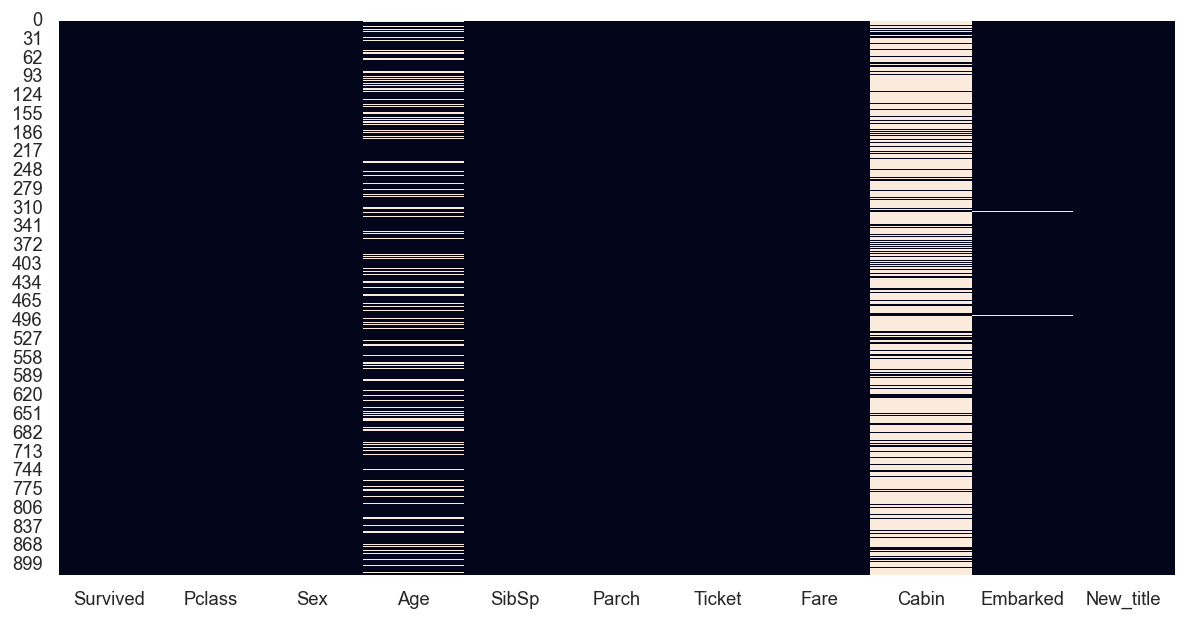

In [9]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Переименовываем кабины по первой букве

In [10]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = [col.strip()[0] for col in df['Cabin']]
df['Cabin'].unique()

array(['C', 'M', 'B', 'D', 'A', 'F', 'E', 'G'], dtype=object)

In [11]:
df[df.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
315,1,1,female,62.0,0,0,Default,80.0,B,NaN,Mrs
487,1,1,female,38.0,0,0,Default,80.0,B,NaN,Miss


### Столбец количество людей в семье. Ведь семья это главное

In [12]:
df["New_family_size"] = df["SibSp"] + df["Parch"] + 1

#### Дропаем столбцы которые делали целый день, потому что они особо не улучшают модель, а только лишь нагружают

In [13]:
df = df.drop(['Ticket','New_title'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
0,0,1,female,50.0,0,0,28.7125,C,C,1
1,0,3,male,NaN,0,0,7.7500,M,Q,1
2,1,2,female,8.0,1,1,26.0000,M,S,3
3,0,3,male,51.0,0,0,7.7500,M,S,1
4,0,3,male,40.0,1,6,46.9000,M,S,8
...,...,...,...,...,...,...,...,...,...,...
911,0,3,male,21.0,0,0,7.7750,M,S,1
912,0,3,male,NaN,0,0,14.5000,M,S,1
913,0,3,male,25.0,0,0,7.0500,M,S,1
914,1,3,male,26.0,0,0,18.7875,M,C,1


In [14]:
X = df.drop(['Survived'], axis = 1)
y = df.Survived

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
584,1,female,25.0,1,2,151.5500,C,S,4
143,3,male,26.0,0,0,8.0500,M,S,1
344,3,male,50.0,1,0,14.5000,M,S,2
747,2,male,19.0,0,0,10.5000,M,S,1
452,3,female,NaN,0,0,7.7500,M,Q,1
...,...,...,...,...,...,...,...,...,...
821,3,male,NaN,0,0,56.4958,M,S,1
74,1,female,30.0,0,0,164.8667,C,S,1
876,3,male,39.0,0,2,7.2292,M,C,3
211,1,male,64.0,0,0,26.0000,M,S,1


In [17]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

sex_transformer = Pipeline(steps=[
    ("sex",OrdinalEncoder())
])

imputer_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5)),
    ('scaler', MinMaxScaler())
])

imput_and_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder())
])


CT = ColumnTransformer([
        ("sex", sex_transformer, ['Sex']),
        ('imputer_Age', imputer_transformer, ['Age']),
        ('imputer_OHE_Embarked', imput_and_OHE, ['Embarked']),
        ('MinMax', MinMaxScaler(), ['Pclass', 'Fare','New_family_size']),
        ('MX', MinMaxScaler(), ['SibSp','Parch']),
        ('Cauta', OneHotEncoder(), make_column_selector(pattern= 'Cabin', dtype_include=object))
    
#         ('New_title', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'New_title', dtype_include=object)),
#         ('Ticket', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'Ticket', dtype_include=object))
    ],  remainder = 'passthrough')


display(CT)
res_ct = CT.fit_transform(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('sex',
                                 Pipeline(steps=[('sex', OrdinalEncoder())]),
                                 ['Sex']),
                                ('imputer_Age',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('imputer_OHE_Embarked',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Embarked']),
                                ('MinMax', MinMaxScaler(),
                                 ['Pclass', 'Fare', 'New_family_size']),
                                ('MX', MinMaxScaler(), ['SibSp', 'Parch']),
                                ('Cauta', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A792C2A60>)])

In [18]:
res_ct

array([[0.        , 0.30669356, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.31929913, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.62183285, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.48317156, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.79831085, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.37015581, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
# z= pd.DataFrame(res_ct.toarray())
z= pd.DataFrame(res_ct, columns = CT.get_feature_names_out())

In [20]:
z.T

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
sex__Sex,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
imputer_Age__Age,0.306694,0.319299,0.621833,0.231060,0.370156,0.483172,0.370156,0.634438,0.785705,0.231060,...,0.370156,0.268877,0.231060,0.483172,0.445355,0.370156,0.369721,0.483172,0.798311,0.370156
imputer_OHE_Embarked__Embarked_C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
imputer_OHE_Embarked__Embarked_Q,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_OHE_Embarked__Embarked_S,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
MinMax__Pclass,0.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,0.000000,...,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
MinMax__Fare,0.295806,0.015713,0.028302,0.020495,0.015127,0.050749,0.015127,0.024447,0.018714,0.051302,...,0.015184,0.040989,0.031425,0.216430,0.153905,0.110272,0.321798,0.014110,0.050749,0.028221
MinMax__New_family_size,0.300000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.100000,0.200000,0.100000,0.000000,0.000000,0.200000,0.000000,0.100000
MX__SibSp,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000
MX__Parch,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000


### Классификация с помощью опорных векторов.

In [21]:
pipe = Pipeline([ ('preprocessing', CT) ,
                 ('svc', SVC(kernel='rbf', C = 10, gamma = 0.1))])
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))

0.8573508005822417
0.834061135371179


<AxesSubplot: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

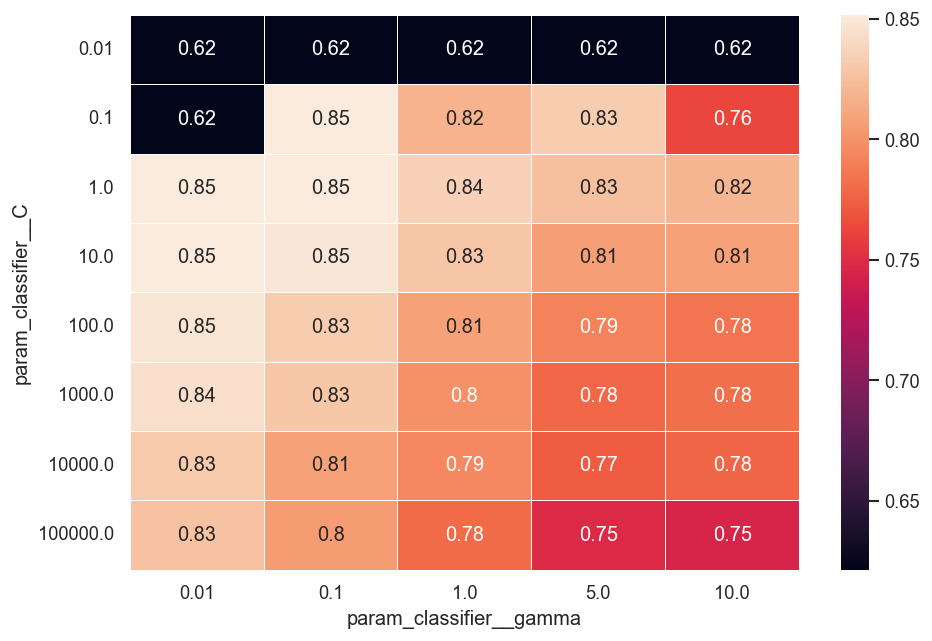

In [22]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5])
gamma=[0.01,0.1,1,5,10]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

Делаем более детальный поиск

<AxesSubplot: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

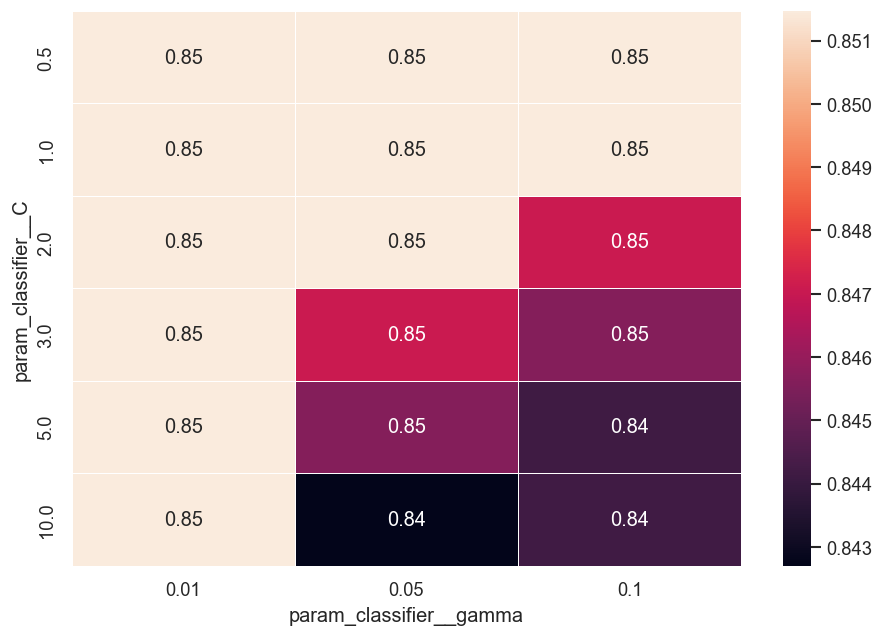

In [23]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC(kernel = 'rbf'))])

C=np.array([0.5,1,2,3,5,10])
gamma=[0.01,0.05,0.1]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe, param_grid, cv=cross_val, return_train_score=True)
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [24]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.029955,0.015868,0.025,0.018141,0.015628,0.015626,0.015625,0.015626,0.02056,0.015626,0.015626,0.018817,0.01892,0.019756,0.018749,0.031252,0.018753,0.018756
std_fit_time,0.026759,0.000389,0.007653,0.006661,0.000004,0.000001,0.000001,0.0,0.006392,0.000001,0.000001,0.006195,0.006172,0.006071,0.006247,0.000001,0.006249,0.006252
mean_score_time,0.012503,0.009374,0.003125,0.012503,0.015547,0.009376,0.015627,0.009376,0.006303,0.009376,0.009375,0.009381,0.0,0.006253,0.009376,0.0,0.009374,0.009375
std_score_time,0.006251,0.007654,0.006251,0.006251,0.000353,0.007655,0.000001,0.007655,0.00772,0.007655,0.007655,0.00766,0.0,0.007658,0.007655,0.0,0.007654,0.007655
param_classifier,"SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)","SVC(C=0.5, gamma=0.01)"
param_classifier__C,0.5,0.5,0.5,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,5.0,5.0,10.0,10.0,10.0
param_classifier__gamma,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi...","{'classifier': SVC(C=0.5, gamma=0.01), 'classi..."
split0_test_score,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.84058


In [25]:
pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC(kernel = 'rbf', C=6, gamma = 0.1))])
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))

0.8573508005822417
0.834061135371179


### Проверим фичи на значимость

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier())])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

gbc['classifier'].feature_importances_

0.9213973799126638

0.8646288209606987

array([6.52122167e-01, 5.91041502e-02, 1.24446782e-03, 5.15419646e-03,
       3.51821333e-04, 6.85285333e-02, 1.20404144e-01, 1.89497839e-02,
       2.97305778e-02, 5.57935459e-03, 9.56565239e-03, 3.30178980e-05,
       2.67120484e-03, 4.69852446e-04, 7.96192417e-03, 4.88444927e-05,
       4.80916204e-03, 1.32711459e-02])

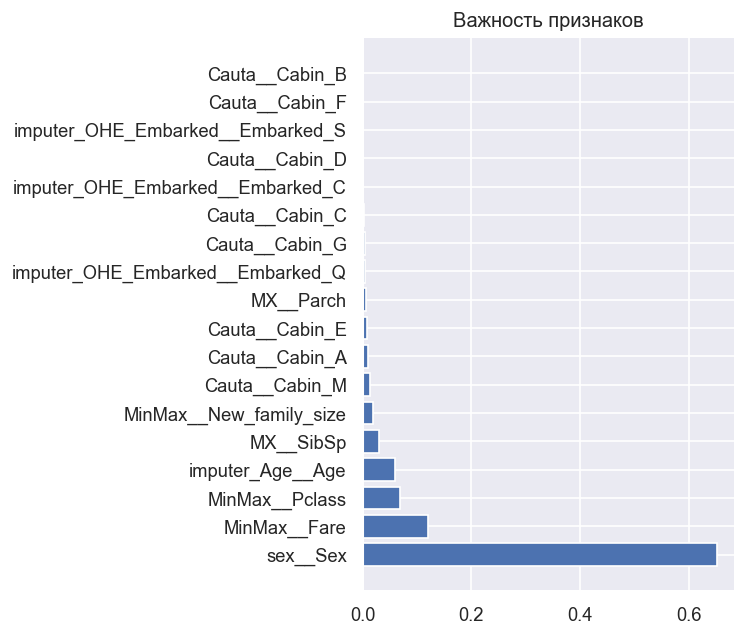

In [27]:
importance = np.sort(gbc['classifier'].feature_importances_)
importance_name = np.argsort(gbc['classifier'].feature_importances_)
feature_names = CT.get_feature_names_out()

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

### KNN смотрим

In [28]:

KNN = Pipeline([('preprocessing', CT),('classifier', KNeighborsClassifier(n_neighbors = 41 , p = 5))])
KNN.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.9213973799126638

0.8646288209606987

In [29]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', KNeighborsClassifier())])

n_neighbors  = np.arange(1,200,10)
p= [1,2,3,4,5,6,7,8,9]
weights = ['uniform']

param_grid = [
    {'preprocessing': [CT],
    'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка


# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('sex',
                                                                         Pipeline(steps=[('sex',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex']),
                                                                        ('imputer_Age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age']),
                                                                        ('imputer_OHE_Embarked',...
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('onehotencoder',
                                                                                              OneHotEncoder())]),
                                                                             ['Embarked']),
                                                                            ('MinMax',
                                                                             MinMaxScaler(),
                                                                             ['Pclass',
                                                                              'Fare',
                                                                              'New_family_size']),
                                                                            ('MX',
                                                                             MinMaxScaler(),
                                                                             ['SibSp',
                                                                              'Parch']),
                                                                            ('Cauta',
                                                                             OneHotEncoder(),
                                                                             <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A792C2A60>)])]}],
             return_train_score=True)

<AxesSubplot: xlabel='param_classifier__p', ylabel='param_classifier__n_neighbors'>

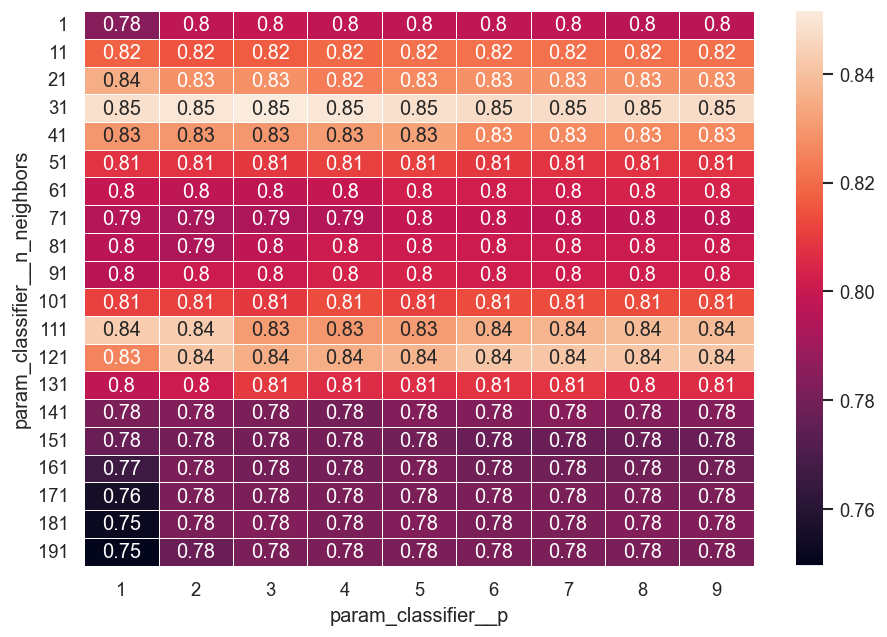

In [30]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_neighbors',columns='param_classifier__p',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [31]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,29,30,28,31,27,35,34,33,32,100,...,135,172,141,140,142,143,144,153,162,171
mean_fit_time,0.031253,0.029183,0.031197,0.025633,0.024161,0.029812,0.033008,0.027607,0.031807,0.021876,...,0.028606,0.032219,0.030007,0.026806,0.028006,0.032207,0.031607,0.029407,0.028406,0.029606
std_fit_time,0.000001,0.00679,0.009791,0.007565,0.006826,0.005303,0.003162,0.003008,0.003828,0.007655,...,0.004588,0.008026,0.00245,0.002926,0.002967,0.006556,0.005163,0.003612,0.003879,0.004318
mean_score_time,0.064076,0.069273,0.037447,0.062505,0.035302,0.056821,0.071015,0.063814,0.066714,0.040629,...,0.052012,0.047508,0.077217,0.068816,0.069816,0.078218,0.049611,0.052211,0.045411,0.052612
std_score_time,0.000003,0.008289,0.007586,0.000002,0.006112,0.005347,0.010395,0.00325,0.002487,0.007655,...,0.007538,0.005231,0.008613,0.003868,0.00845,0.011603,0.007285,0.012092,0.005085,0.00723
param_classifier,"KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)",...,"KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)","KNeighborsClassifier(n_neighbors=31, p=3)"
param_classifier__n_neighbors,31,31,31,31,31,31,31,31,31,111,...,151,191,151,151,151,151,161,171,181,191
param_classifier__p,3,4,2,5,1,9,8,7,6,2,...,1,2,7,6,8,9,1,1,1,1
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeig

### РандомФоресту посвящен всего один блок :)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_1= Pipeline([('preprocessing',CT),('classifier',RandomForestClassifier(n_estimators=200,max_features='sqrt', min_samples_leaf = 4) )]) 
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))
# мало деревьев в лесу

Правильность на обучающем наборе: 0.889
Правильность на тестовом наборе: 0.873


### Градиентный бустинг через сетку? Что-то новенькое

In [33]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier())])

n_estimators  = np.arange(100,500,25)
min_samples_leaf = [1,3,5,7,9,11]
# learning_rate = np.arange(0.01,0.2,0.02)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_estimators,
     'classifier__min_samples_leaf': min_samples_leaf
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('sex',
                                                                         Pipeline(steps=[('sex',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex']),
                                                                        ('imputer_Age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age']),
                                                                        ('imputer_OHE_Embarked',...
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('onehotencoder',
                                                                                              OneHotEncoder())]),
                                                                             ['Embarked']),
                                                                            ('MinMax',
                                                                             MinMaxScaler(),
                                                                             ['Pclass',
                                                                              'Fare',
                                                                              'New_family_size']),
                                                                            ('MX',
                                                                             MinMaxScaler(),
                                                                             ['SibSp',
                                                                              'Parch']),
                                                                            ('Cauta',
                                                                             OneHotEncoder(),
                                                                             <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A792C2A60>)])]}],
             return_train_score=True)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__n_estimators'>

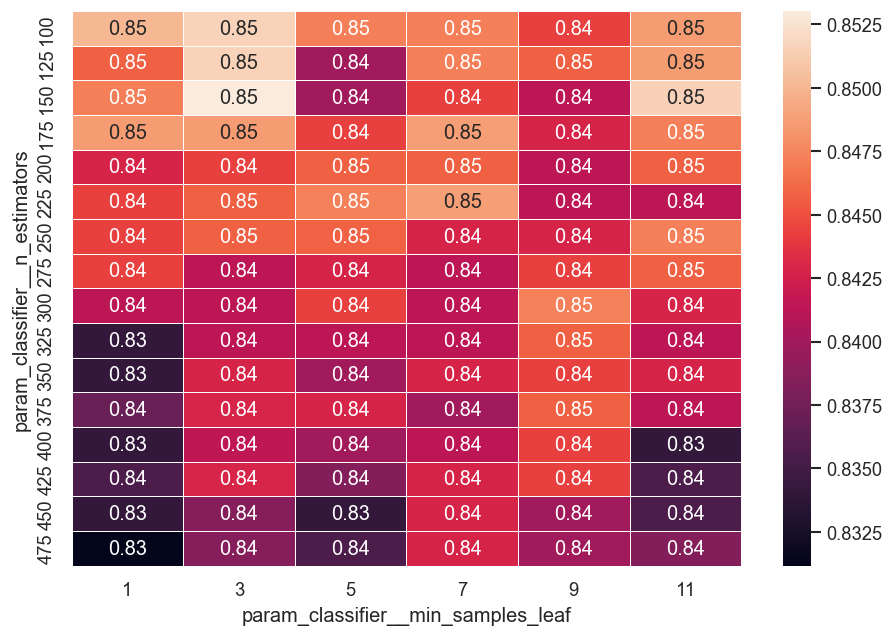

In [34]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [35]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier())])

n_estimators  = np.arange(100,200,5)
min_samples_leaf = [1,3,5,7,9,11]
# learning_rate = np.arange(0.01,0.2,0.02)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_estimators,
     'classifier__min_samples_leaf': min_samples_leaf
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('sex',
                                                                         Pipeline(steps=[('sex',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex']),
                                                                        ('imputer_Age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age']),
                                                                        ('imputer_OHE_Embarked',...
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('onehotencoder',
                                                                                              OneHotEncoder())]),
                                                                             ['Embarked']),
                                                                            ('MinMax',
                                                                             MinMaxScaler(),
                                                                             ['Pclass',
                                                                              'Fare',
                                                                              'New_family_size']),
                                                                            ('MX',
                                                                             MinMaxScaler(),
                                                                             ['SibSp',
                                                                              'Parch']),
                                                                            ('Cauta',
                                                                             OneHotEncoder(),
                                                                             <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A792C2A60>)])]}],
             return_train_score=True)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__n_estimators'>

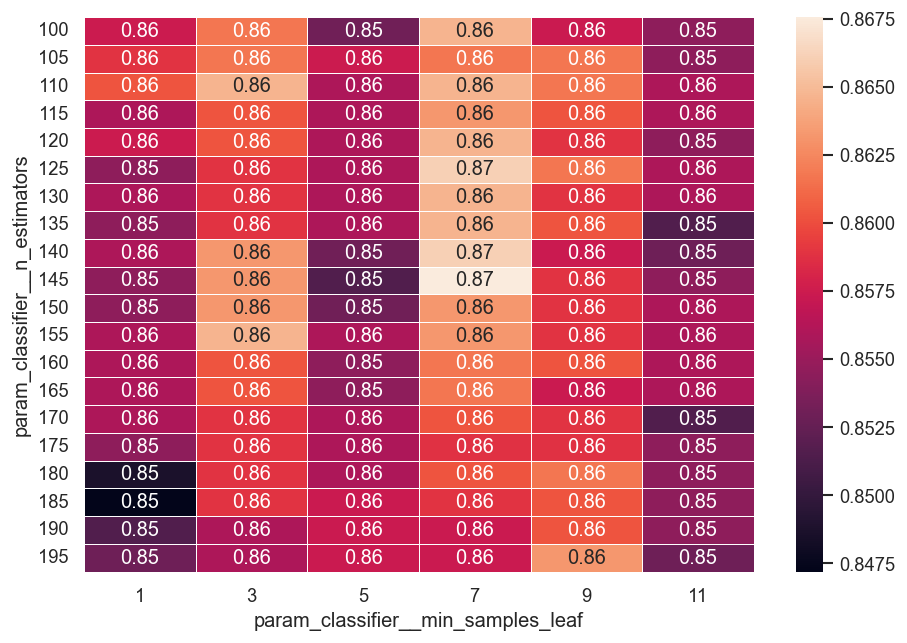

In [36]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

### А здесь правильный подход к поиску параметров

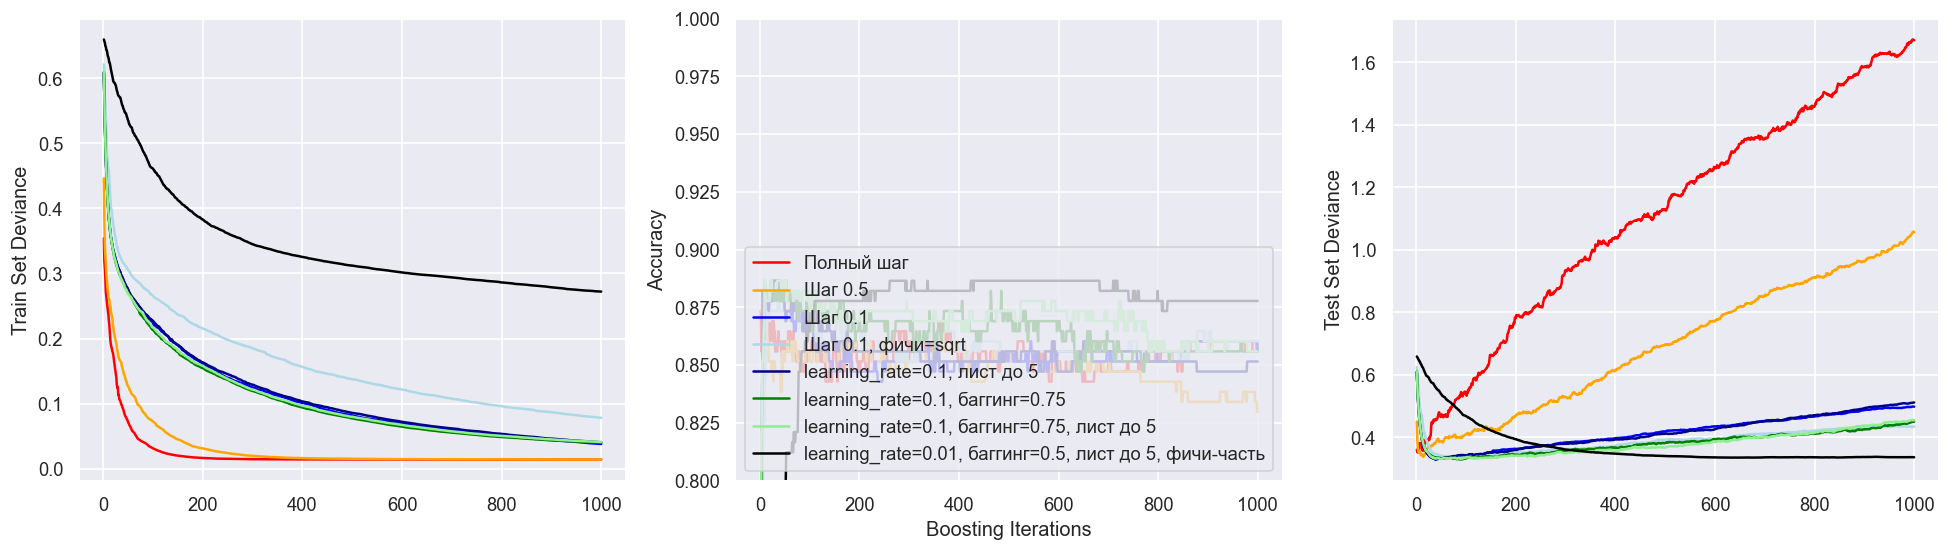

In [37]:
labels, y = np.unique(y, return_inverse=True)
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss

original_params = {
    "n_estimators": 1000,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, баггинг=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, баггинг=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    
    params = dict(original_params)
    params.update(setting)

    clf = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params))])

    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    X_train_for_proba = CT.fit_transform(X_train)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_train_for_proba)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    X_test_for_proba = CT.transform(X_test)
    for i, y_pred in enumerate(clf['classifier'].staged_predict(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = accuracy_score(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        
    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()


In [38]:
# Черная линия без фичинга 
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.893740902474527

0.8777292576419214

In [39]:
# Синяя линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
    gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.9213973799126638

0.868995633187773

In [40]:
# Голубая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.9141193595342066

0.8646288209606987

### Про логрег тоже не забываем

In [41]:
from sklearn.linear_model import LogisticRegression
clf = Pipeline([('preprocessing',CT),('classifier',LogisticRegression()) ]) 

param_grid =[
    {'classifier__penalty': ['l2'], 'classifier__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['elasticnet'], 'classifier__solver': ['lbfgs','newton-cg'], 'classifier__C': [0.001, 0.01, 0.1, 1, 10]}]

grid = GridSearchCV(clf, param_grid, return_train_score=True)

grid.fit(X_train, y_train)
clf_reg = grid.best_estimator_
clf_reg.fit(X_train,y_train)
print(grid.best_params_)
print(clf_reg.score(X_train,y_train))
print(clf_reg.score(X_test,y_test))

{'classifier__C': 2, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
0.8558951965065502
0.8427947598253275


### Запускаем самолетики

In [42]:
clf_list = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC() ]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=StratifiedKFold(5))
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.85507246, 0.8115942 , 0.83211679, 0.77372263, 0.80291971]),
 array([0.85507246, 0.82608696, 0.87591241, 0.86131387, 0.84671533]),
 array([0.82608696, 0.83333333, 0.8540146 , 0.80291971, 0.84671533]),
 array([0.85507246, 0.83333333, 0.88321168, 0.8540146 , 0.84671533]),
 array([0.86231884, 0.81884058, 0.86861314, 0.83941606, 0.84671533])]

In [43]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),SVC()
0,0.855072,0.855072,0.826087,0.855072,0.862319
1,0.811594,0.826087,0.833333,0.833333,0.818841
2,0.832117,0.875912,0.854015,0.883212,0.868613
3,0.773723,0.861314,0.802920,0.854015,0.839416
4,0.802920,0.846715,0.846715,0.846715,0.846715


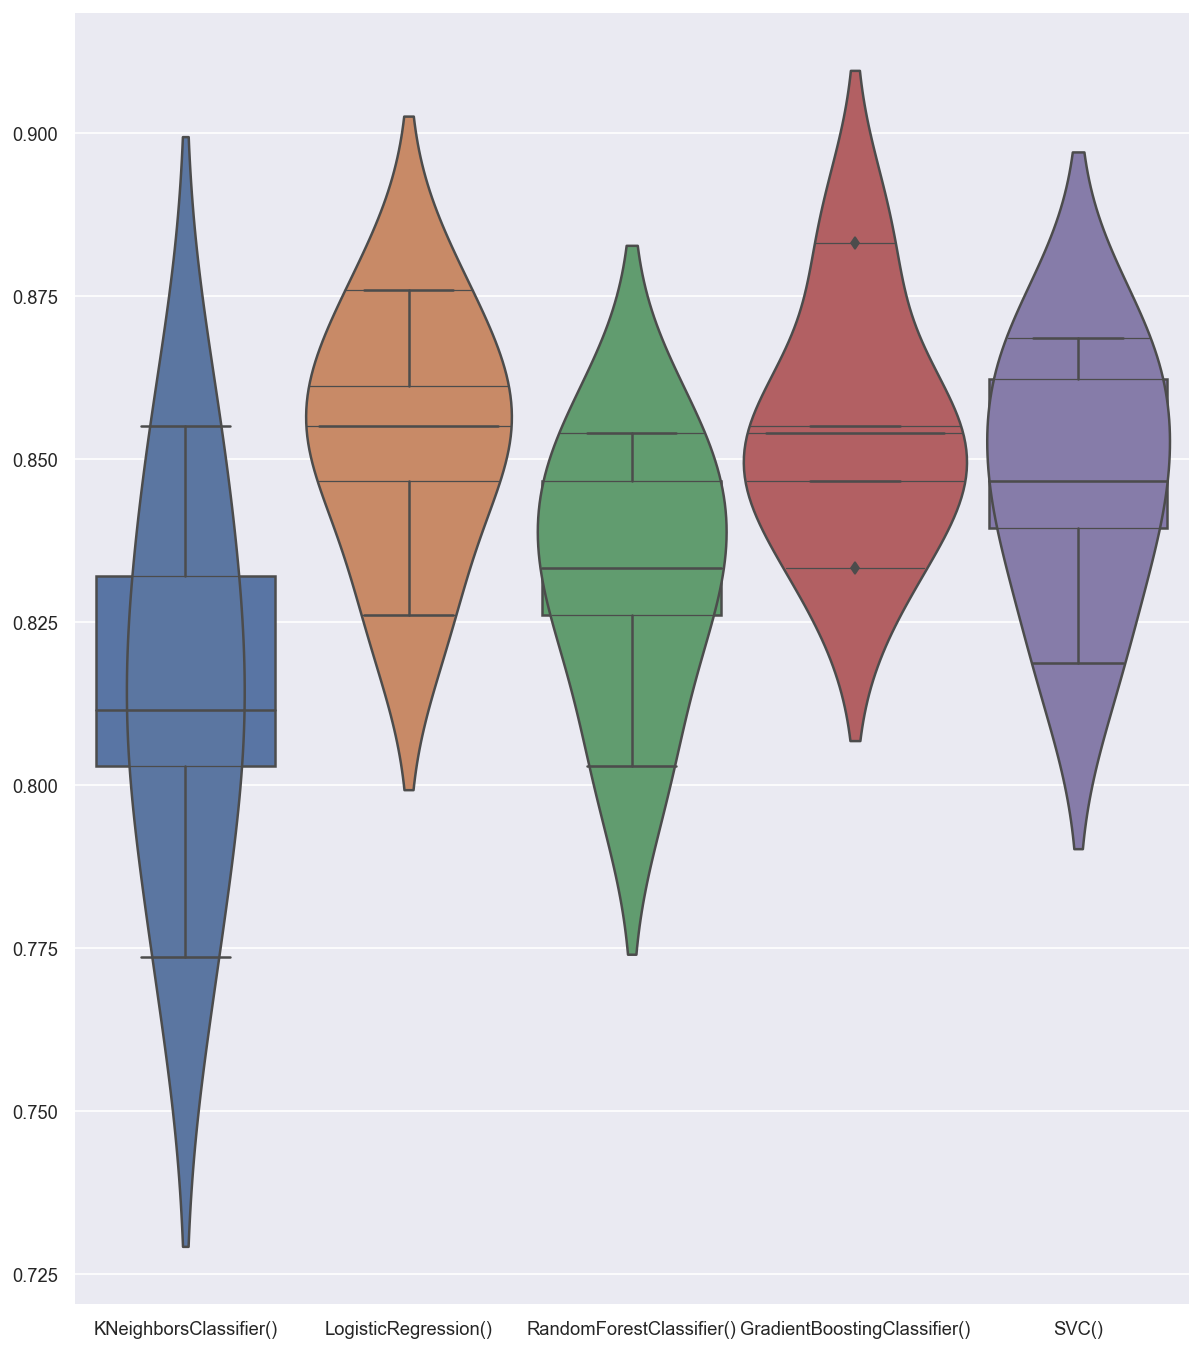

In [44]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

Accuracy: 0.86 (+/- 0.02) [Gradient Boosting]
Accuracy: 0.86 (+/- 0.02) [Logistic Regression]
Accuracy: 0.86 (+/- 0.02) [Random Forest]
Accuracy: 0.86 (+/- 0.02) [Ensemble]


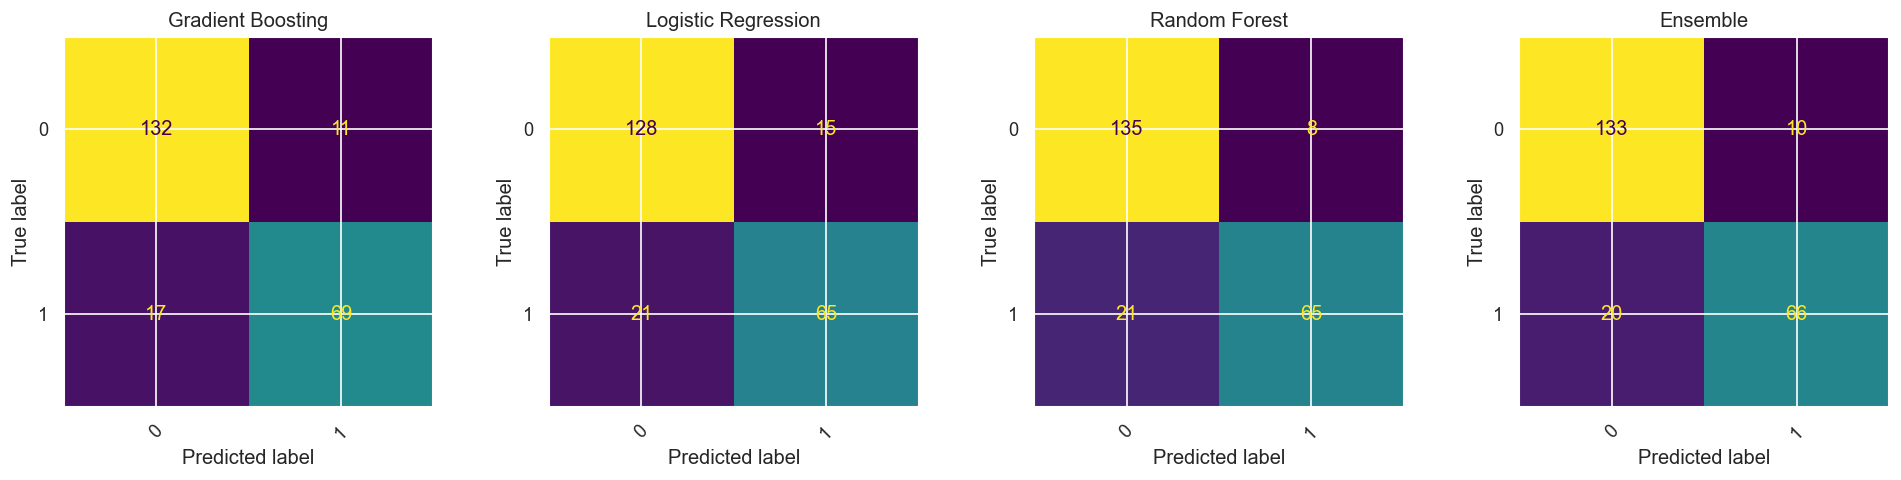

In [45]:
from sklearn.ensemble import VotingClassifier


# clf1 = Pipeline([('preprocessing', CT),
#                  ('classifier',  KNeighborsClassifier(n_neighbors = 41 , p = 5))])

clf1 = Pipeline([('preprocessing', CT),
                 ('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])
clf2 = Pipeline([('preprocessing', CT),
                 ('classifier', LogisticRegression(C=2, penalty = 'l1', solver= 'saga')) ]) 

clf3 = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestClassifier(n_estimators=200,max_features='sqrt', min_samples_leaf = 4))]) 

# clf1 = LogisticRegression(random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('gb', clf1), ('lr', clf2), ('rf', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble'])):
    y_pred = clf.fit(X_train,y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=['0','1'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()

### Упс , а как фитить то на VotingClassifier? ошибку выдает(

In [46]:
c1 = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900)
c2 = LogisticRegression(C=2, penalty = 'l1', solver= 'saga')

c3 = RandomForestClassifier(n_estimators=200,max_features='sqrt', min_samples_leaf = 4)


pipe_hard = Pipeline([('preprocessing', CT),('classifier', 
                                      VotingClassifier(estimators=[('gb', c1), ('lr', c2), ('rf', c3)], 
                                                       voting='hard'))])
pipe_hard.fit(X_train, y_train)
display(pipe_hard.score(X_train, y_train))
display(pipe_hard.score(X_test, y_test))

0.883551673944687

0.8733624454148472

### Выбрал в итоге эту модель, вроде неплохая

In [47]:
clf1 = Pipeline([('preprocessing', CT),
                 ('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])

clf1.fit(X_train, y_train)
display(clf1.score(X_train, y_train))
display(clf1.score(X_test, y_test))

0.8951965065502183

0.8733624454148472

## Файл fin_model.ipynb

In [48]:
df2 = pd.read_csv('test.csv')
df2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,393.000000,308.000000,393.000000,393.000000,392.000000
mean,2.310433,30.431299,0.475827,0.358779,34.866868
std,0.827042,13.875563,1.042491,0.759988,62.228041
min,1.000000,0.330000,0.000000,0.000000,0.000000
25%,2.000000,21.750000,0.000000,0.000000,7.925000
50%,3.000000,29.000000,0.000000,0.000000,13.775000
75%,3.000000,39.000000,1.000000,0.000000,30.017700
max,3.000000,76.000000,8.000000,5.000000,512.329200


In [49]:
df2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
1,3,"Foley, Mr. Joseph",male,26.00,0,0,330910,7.8792,NaN,Q
2,1,"Molson, Mr. Harry Markland",male,55.00,0,0,113787,30.5000,C30,S
3,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
4,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
388,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
389,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.00,0,1,111361,57.9792,B18,C
390,3,"Hansen, Mr. Henry Damsgaard",male,21.00,0,0,350029,7.8542,NaN,S
391,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


In [50]:
df2['Cabin'] = df2['Cabin'].fillna('Missing')
df2['Cabin'] = [col.strip()[0] for col in df2['Cabin']]
df2['Cabin'].unique()

array(['C', 'M', 'E', 'A', 'D', 'B', 'F', 'G', 'T'], dtype=object)

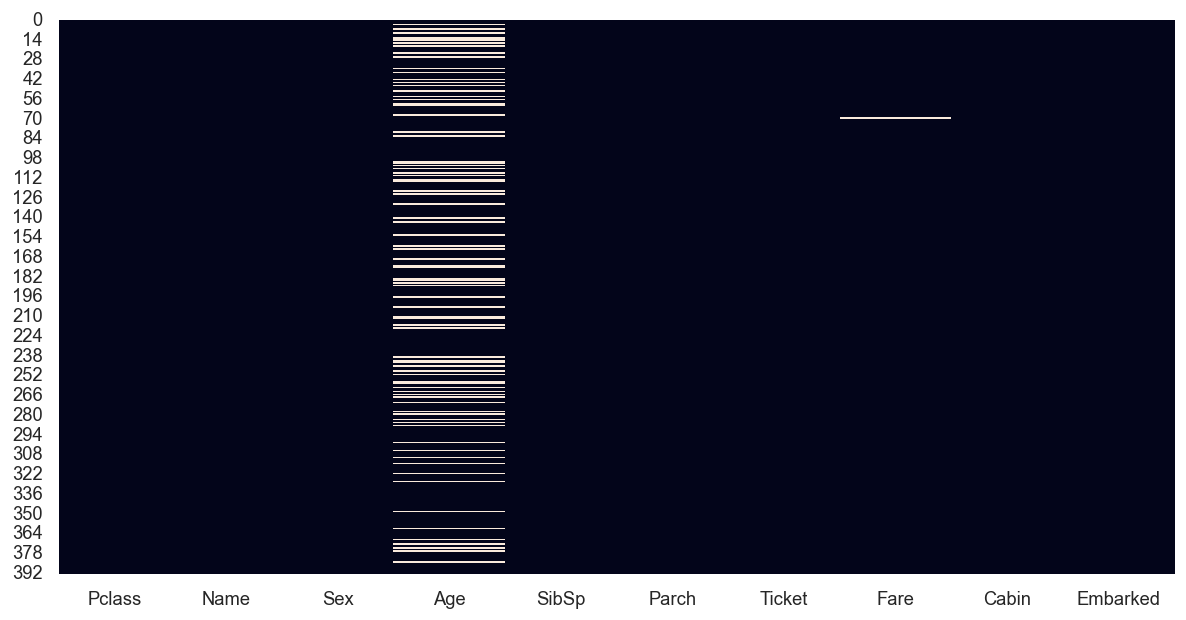

In [51]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [52]:
fare_mean = df2['Fare'].mean()

# заменить все пропущенные значения в колонке Fare средним значением
df2['Fare'].fillna(fare_mean, inplace=True)

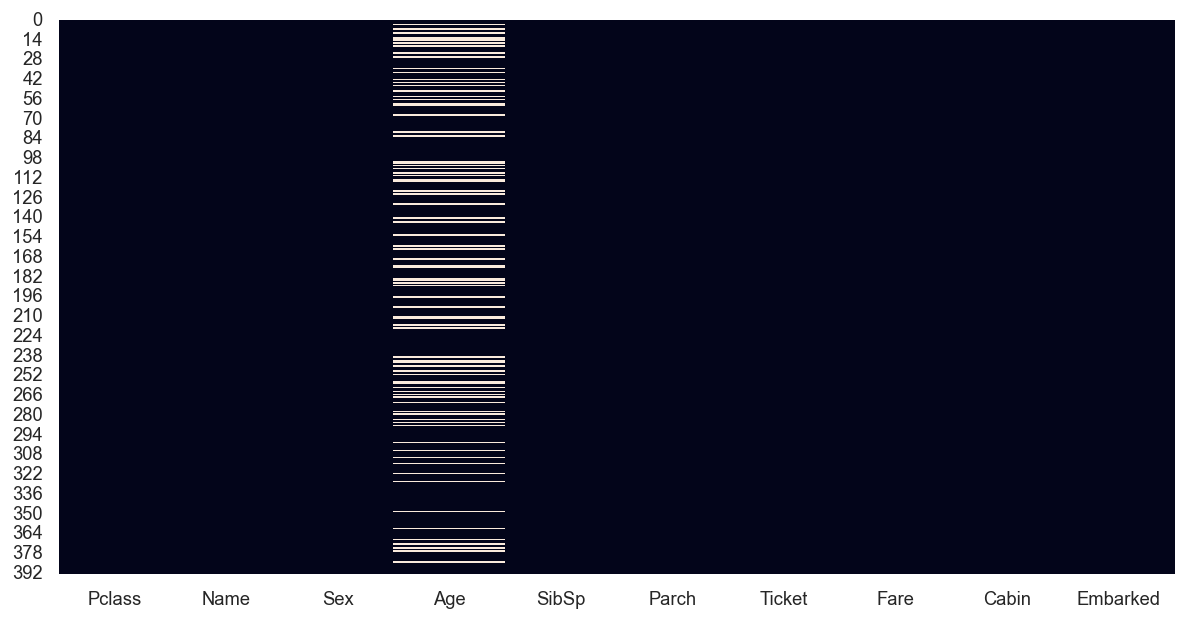

In [54]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [56]:
df2["New_family_size"] = df2["SibSp"] + df2["Parch"] + 1

In [58]:
df2 = df2.drop(['Name','Ticket'],axis=1)

In [59]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
0,1,female,58.00,0,1,153.4625,C,S,2
1,3,male,26.00,0,0,7.8792,M,Q,1
2,1,male,55.00,0,0,30.5000,C,S,1
3,3,female,NaN,0,0,7.8792,M,Q,1
4,3,male,20.00,0,0,8.0500,M,S,1
...,...,...,...,...,...,...,...,...,...
388,3,male,0.42,0,1,8.5167,M,C,2
389,1,female,44.00,0,1,57.9792,B,C,2
390,3,male,21.00,0,0,7.8542,M,S,1
391,3,male,74.00,0,0,7.7750,M,S,1


In [61]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

sex_transformer = Pipeline(steps=[
    ("sex",OrdinalEncoder())
])

imputer_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5)),
    ('scaler', MinMaxScaler())
])

imput_and_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder())
])


CT2 = ColumnTransformer([
        ("sex", sex_transformer, ['Sex']),
        ('imputer_Age', imputer_transformer, ['Age']),
        ('imputer_OHE_Embarked', imput_and_OHE, ['Embarked']),
        ('MinMax', MinMaxScaler(), ['Pclass', 'Fare','New_family_size']),
        ('MX', MinMaxScaler(), ['SibSp','Parch']),
        ('Cauta', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'Cabin', dtype_include=object))
    
#         ('New_title', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'New_title', dtype_include=object)),
#         ('Ticket', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'Ticket', dtype_include=object))
    ],  remainder = 'passthrough')


display(CT2)
res_ct = CT2.fit_transform(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('sex',
                                 Pipeline(steps=[('sex', OrdinalEncoder())]),
                                 ['Sex']),
                                ('imputer_Age',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('imputer_OHE_Embarked',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Embarked']),
                                ('MinMax', MinMaxScaler(),
                                 ['Pclass', 'Fare', 'New_family_size']),
                                ('MX', MinMaxScaler(), ['SibSp', 'Parch']),
                                ('Cauta',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A01591AC0>)])

In [62]:
# Голубая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT2),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X_train, y_train)

gbc.predict(df2)


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,